# **Handwritten Digit Prediction** 
## My First Kaggle notebook
### Digits are predicted by using simple ANN model.

**Importing the neccessary libraries** 

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation

In [27]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


**Reading the data**

In [2]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
digits=pd.concat([train,test],axis=0)
train.shape,test.shape

((42000, 785), (28000, 784))

In [3]:
#printing the mergerd data
print(digits.shape)
digits.head()

(70000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the class label from the dataset

In [4]:
target=train.label
train.drop(columns=['label'],inplace=True)

### Converting target/class label into np array

In [5]:
y_train=np.asarray(target)
y_train

array([1, 0, 1, ..., 7, 6, 9])

### Also converting features of train and test datasets into array

In [6]:
X_train=np.asarray(train)
X_test=np.asarray(test)
X_train.shape,X_test.shape

((42000, 784), (28000, 784))

    Normalizing the features into 0 to 1 scale
    Pixels values ranges from 0 to 255

In [7]:
X_train=X_train/255
X_test=X_test/255

### reshaping the array to make it into matrix form


In [8]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)
X_train.shape,X_test.shape

((42000, 28, 28), (28000, 28, 28))

now there are 42000 rows, each row of 28*28 dimensions

### Vizualizing the array of matrix form
    some samples drawn from training an testing arrays

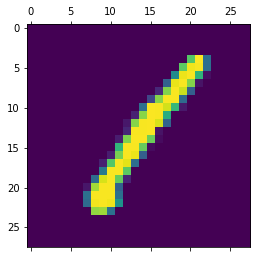

In [9]:
plt.matshow(X_train[0])
plt.show()

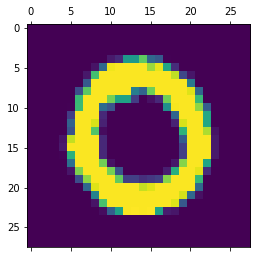

In [10]:
plt.matshow(X_train[1])
plt.show()

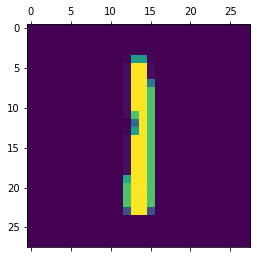

In [11]:
plt.matshow(X_train[2])
plt.show()

In [29]:
#Class labels of above image pixels of training data
y_train[0:3]

array([1, 0, 1])

### We have to predict the following pixel images of test data

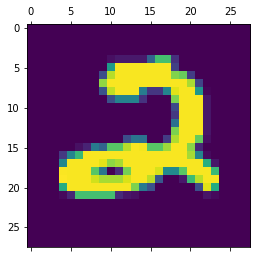

In [30]:
# test image pixel
plt.matshow(X_test[0])
plt.show()

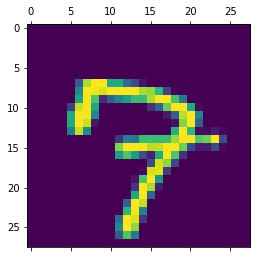

In [32]:
# test image pixel
plt.matshow(X_test[5])
plt.show()

In [14]:
#class labeles present in datasets
class_labels=list(set(y_train))
class_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## **Model Building using ANN**


In [15]:
ann=Sequential()

In [17]:
# input layers of size of 28*28
ann.add(Flatten(input_shape=[28,28]))

#hidden layer containing 100 neurons
ann.add(Dense(100,activation='relu'))

#output layers containing 10 neurons to predict each of digit
ann.add(Dense(10,activation='softmax'))

In [18]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
ann.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
            

In [20]:
ann.fit(X_train,y_train,batch_size=32,epochs=15)

Epoch 1/15
42000/42000 [==============================] - 4s 92us/step - loss: 0.3142 - accuracy: 0.9110
Epoch 2/15
42000/42000 [==============================] - 4s 85us/step - loss: 0.1400 - accuracy: 0.9594
Epoch 3/15
42000/42000 [==============================] - 3s 83us/step - loss: 0.0994 - accuracy: 0.9711
Epoch 4/15
42000/42000 [==============================] - 3s 82us/step - loss: 0.0743 - accuracy: 0.9782
Epoch 5/15
42000/42000 [==============================] - 3s 82us/step - loss: 0.0594 - accuracy: 0.9817
Epoch 6/15
42000/42000 [==============================] - 3s 82us/step - loss: 0.0467 - accuracy: 0.9863
Epoch 7/15
42000/42000 [==============================] - 3s 82us/step - loss: 0.0390 - accuracy: 0.9877
Epoch 8/15
42000/42000 [==============================] - 3s 83us/step - loss: 0.0306 - accuracy: 0.9910
Epoch 9/15
42000/42000 [==============================] - 3s 81us/step - loss: 0.0260 - accuracy: 0.9920
Epoch 10/15
42000/42000 [==============================

In [21]:
detail=ann.evaluate(X_train,y_train)
print('loss:',detail[0])
print('accuracy achieved:',round(detail[1]*100,4))

42000/42000 [==============================] - 1s 33us/step
loss: 0.006716124764517493
accuracy achieved: 99.8381


### Predicting the class labels for X_test/test data

In [22]:
y_pred=ann.predict(X_test)

In [53]:
#predicted digits are output of test data
predicted_digits=[class_labels[np.argmax(y_pred[i])] for i in range(len(y_pred))]
print("first ten outputs of test data:",*predicted_digits[:10])
                  

first ten outputs of test data: 2 0 9 9 3 7 0 3 0 3


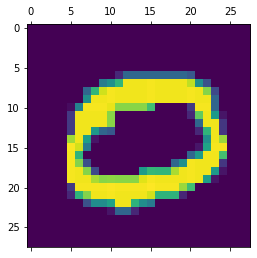

In [24]:
#checking our output for 2nd digit in test data
plt.matshow(X_test[1])
plt.show()

In [25]:
#above pixel image is 0 and prediction also showing 0
predicted_digits[1]

0

## **Prediction on some random samples of Test data using ANN model**

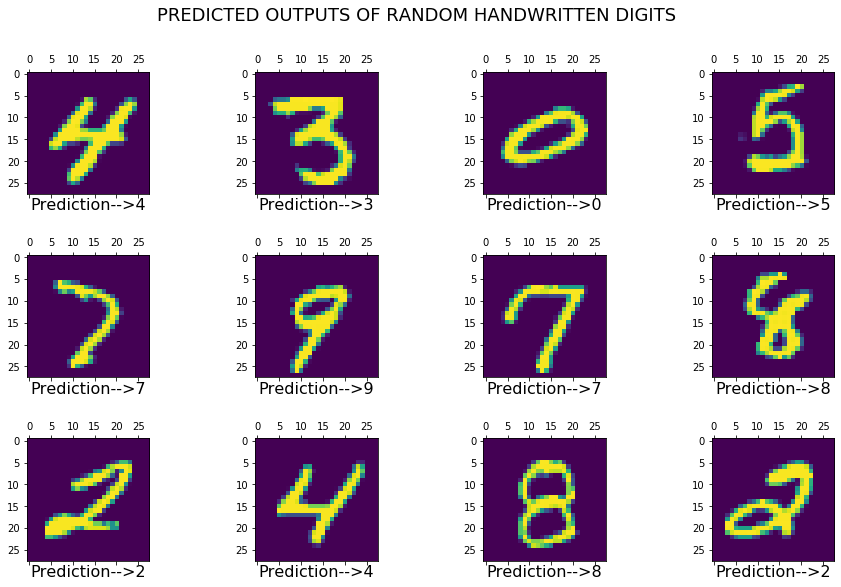

In [26]:
images=np.random.choice(len(X_test),size=12)
print("")
fig=plt.figure(figsize=(15,9))
fig.suptitle("predicted outputs of random handwritten digits".upper(),fontsize=18)
fig.subplots_adjust(hspace=0.5,wspace=0.5)

for i,num in zip(images,range(1,13)):
    label=class_labels[np.argmax(y_pred[i])]
    ax=fig.add_subplot(3,4,num)
    ax.matshow(X_test[i])
    ax.set_xlabel("Prediction-->{}".format(label),fontsize=16)

### Again comparing my the model output with test pixel images

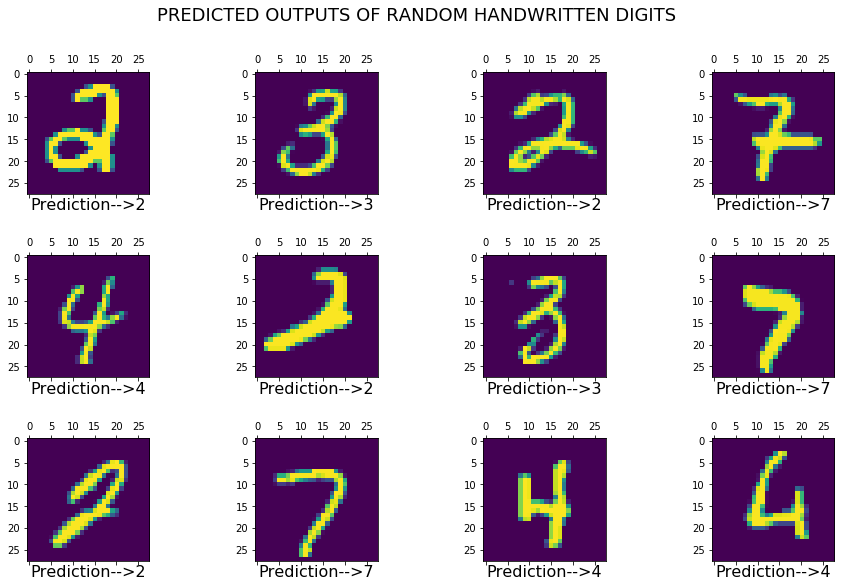

In [44]:
images=np.random.choice(len(X_test),size=12)
print("")
fig=plt.figure(figsize=(15,9))
fig.suptitle("predicted outputs of random handwritten digits".upper(),fontsize=18)
fig.subplots_adjust(hspace=0.5,wspace=0.5)

for i,num in zip(images,range(1,13)):
    label=class_labels[np.argmax(y_pred[i])]
    ax=fig.add_subplot(3,4,num)
    ax.matshow(X_test[i])
    ax.set_xlabel("Prediction-->{}".format(label),fontsize=16)

In [35]:
y_train_pred=ann.predict(X_train)

In [37]:
y_train_p=[class_labels[np.argmax(y_train_pred[i])] for i in range(len(y_train_pred))]
y_train_p[0:10]

[1, 0, 1, 4, 0, 0, 7, 3, 5, 3]

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
con_mat=confusion_matrix(y_train,y_train_p)
print("Confusion Matrix")
pd.DataFrame(con_mat,columns=class_labels,index=class_labels)

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9
0,4127,0,0,0,0,0,0,0,1,4
1,0,4682,0,0,1,0,0,0,1,0
2,0,0,4175,1,0,0,0,1,0,0
3,0,0,1,4346,0,0,0,0,2,2
4,0,0,0,0,4070,0,0,0,0,2
5,0,1,0,7,1,3764,2,0,5,15
6,0,1,0,0,2,0,4134,0,0,0
7,0,1,0,0,1,0,0,4391,0,8
8,0,4,0,0,0,0,0,0,4055,4
9,0,0,0,0,0,0,0,0,0,4188


## The model truly predicted some random samples of test data (checked by running that code multiple times)
### **If you find any mistake in above code please feel free to comment and give me advices**
###    ** Happy Learning**

### submission

In [56]:
my_submission=pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
my_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [61]:
my_submission['Label']=predicted_digits
my_submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [64]:
my_submission.to_csv("digits_submission.csv",index=False)

In [65]:
#pd.read_csv("digits_submission.csv")

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
